In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# from keras.datasets import mnist
# from keras.utils import np_utils
# from keras import models
# from keras import layers
from tensorflow.keras import optimizers
# from sklearn import metrics
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
import seaborn as sns
#import tensorflow as tf
from scipy.signal import butter, lfilter, freqz
from scipy.ndimage import gaussian_filter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model

2022-01-20 09:15:50.807588: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-20 09:15:50.807628: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data Preprocessing

## Reading Data

In [2]:
# Reading data from excel file
df = pd.read_csv("data/corpus_students_only_validated_targets.csv")

In [3]:
# Visualization of the all data
display(df)

,Unnamed: 0,subjectId,tgt_number,timestamp,shPitch,shRoll,armYaw,elbPitch,forearmYaw,wriPitch,...,tgtRemapYaw,elbRemapPosRefShouX,elbRemapPosRefShouY,elbRemapPosRefShouZ,wriRemapPosRefElbX,wriRemapPosRefElbY,wriRemapPosRefElbZ,handRemapPosRefWriX,handRemapPosRefWriY,handRemapPosRefWriZ
0,0,10,0,0.021321,-0.207269,-0.139305,0.590163,-1.124028,0.437425,-0.172744,...,-3.125513,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
1,1,10,0,0.032686,-0.208174,-0.139678,0.590870,-1.123488,0.437940,-0.172283,...,-3.125513,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
2,2,10,0,0.043437,-0.208109,-0.139475,0.590799,-1.123379,0.438620,-0.171821,...,-3.125513,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
3,3,10,0,0.055584,-0.208239,-0.139492,0.591435,-1.123350,0.438833,-0.171277,...,-3.125513,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
4,4,10,0,0.065655,-0.208122,-0.139372,0.591197,-1.123311,0.438889,-0.170947,...,-3.125513,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881694,881694,32,4898,1043.704224,-0.374607,-0.729790,0.162881,-1.857293,-0.983636,0.043440,...,-3.127899,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
881695,881695,32,4898,1043.714966,-0.375450,-0.729012,0.163776,-1.857483,-0.985459,0.043212,...,-3.127986,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
881696,881696,32,4898,1043.727051,-0.375700,-0.727945,0.164108,-1.858276,-0.984668,0.044183,...,-3.128112,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
881697,881697,32,4898,1043.738403,-0.375495,-0.727270,0.163958,-1.859209,-0.984431,0.043964,...,-3.128213,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791


## Sorted Data by intersting columns

In [4]:
#Keep only the values of output/input and ID of the subject and ID of the target
df_sorted = df[['subjectId','tgt_number','shPitch', 'shRoll','armYaw','elbPitch','forearmYaw','wriPitch','wriRoll','handRemapPosX','handRemapPosY','handRemapPosZ','handRemapPitch','handRemapRoll']]
display(df_sorted)

,subjectId,tgt_number,shPitch,shRoll,armYaw,elbPitch,forearmYaw,wriPitch,wriRoll,handRemapPosX,handRemapPosY,handRemapPosZ,handRemapPitch,handRemapRoll
0,10,0,-0.207269,-0.139305,0.590163,-1.124028,0.437425,-0.172744,-0.316933,0.104115,-0.427305,0.341101,0.291809,-0.746049
1,10,0,-0.208174,-0.139678,0.590870,-1.123488,0.437940,-0.172283,-0.316804,0.104262,-0.427390,0.341057,0.292196,-0.745820
2,10,0,-0.208109,-0.139475,0.590799,-1.123379,0.438620,-0.171821,-0.316609,0.104394,-0.427472,0.341001,0.292807,-0.746017
3,10,0,-0.208239,-0.139492,0.591435,-1.123350,0.438833,-0.171277,-0.316134,0.104292,-0.427450,0.341244,0.292540,-0.747592
4,10,0,-0.208122,-0.139372,0.591197,-1.123311,0.438889,-0.170947,-0.315781,0.104338,-0.427519,0.341210,0.292919,-0.748280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881694,32,4898,-0.374607,-0.729790,0.162881,-1.857293,-0.983636,0.043440,-0.143309,-0.087936,-0.090415,0.363713,0.081177,0.159412
881695,32,4898,-0.375450,-0.729012,0.163776,-1.857483,-0.985459,0.043212,-0.143321,-0.087603,-0.090137,0.364029,0.080878,0.159761
881696,32,4898,-0.375700,-0.727945,0.164108,-1.858276,-0.984668,0.044183,-0.143792,-0.087456,-0.089809,0.364092,0.080799,0.161681
881697,32,4898,-0.375495,-0.727270,0.163958,-1.859209,-0.984431,0.043964,-0.144698,-0.087387,-0.089646,0.364047,0.080749,0.164148


### Information about the sorted data

Text(0, 0.5, 'Valeurs angulaire (rad)')

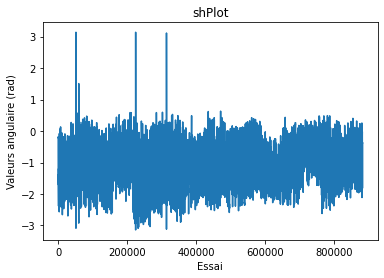

In [5]:
#Plotting the values of shPitch
plt.plot(df_sorted['shPitch'])
plt.title("shPlot")
# Setting the X and Y labels
plt.xlabel('Essai')
plt.ylabel('Valeurs angulaire (rad)')

Text(0, 0.5, 'Valeurs angulaire (rad)')

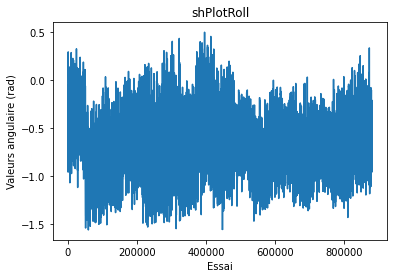

In [6]:
#Plotting the values of shRoll
plt.plot(df_sorted['shRoll'])
plt.title("shPlotRoll")
# Setting the X and Y labels
plt.xlabel('Essai')
plt.ylabel('Valeurs angulaire (rad)')

In [7]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881699 entries, 0 to 881698
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   subjectId       881699 non-null  int64  
 1   tgt_number      881699 non-null  int64  
 2   shPitch         881699 non-null  float64
 3   shRoll          881699 non-null  float64
 4   armYaw          881699 non-null  float64
 5   elbPitch        881699 non-null  float64
 6   forearmYaw      881699 non-null  float64
 7   wriPitch        881699 non-null  float64
 8   wriRoll         881699 non-null  float64
 9   handRemapPosX   881699 non-null  float64
 10  handRemapPosY   881699 non-null  float64
 11  handRemapPosZ   881699 non-null  float64
 12  handRemapPitch  881699 non-null  float64
 13  handRemapRoll   881699 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 94.2 MB


## Taking the sorted data and undersampled them to 9Hz (Taking 1 line each 10 lines)

In [8]:
df_tri=df_sorted.iloc[::10,:]
df_tri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88170 entries, 0 to 881690
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subjectId       88170 non-null  int64  
 1   tgt_number      88170 non-null  int64  
 2   shPitch         88170 non-null  float64
 3   shRoll          88170 non-null  float64
 4   armYaw          88170 non-null  float64
 5   elbPitch        88170 non-null  float64
 6   forearmYaw      88170 non-null  float64
 7   wriPitch        88170 non-null  float64
 8   wriRoll         88170 non-null  float64
 9   handRemapPosX   88170 non-null  float64
 10  handRemapPosY   88170 non-null  float64
 11  handRemapPosZ   88170 non-null  float64
 12  handRemapPitch  88170 non-null  float64
 13  handRemapRoll   88170 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 9.4 MB


### Comparing Sorted data by columns 9Hz to 90Hz 

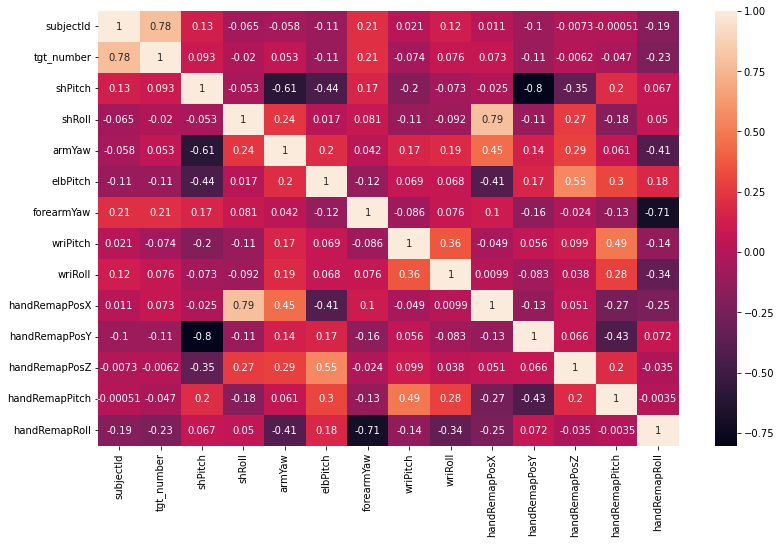

In [9]:
#Plot the correlation matrix to compare with the sorted one, we can see that is the same
corr_df = df_tri.corr() 
plt.figure(figsize=(13, 8))
sns.heatmap(corr_df, annot=True)
plt.show()

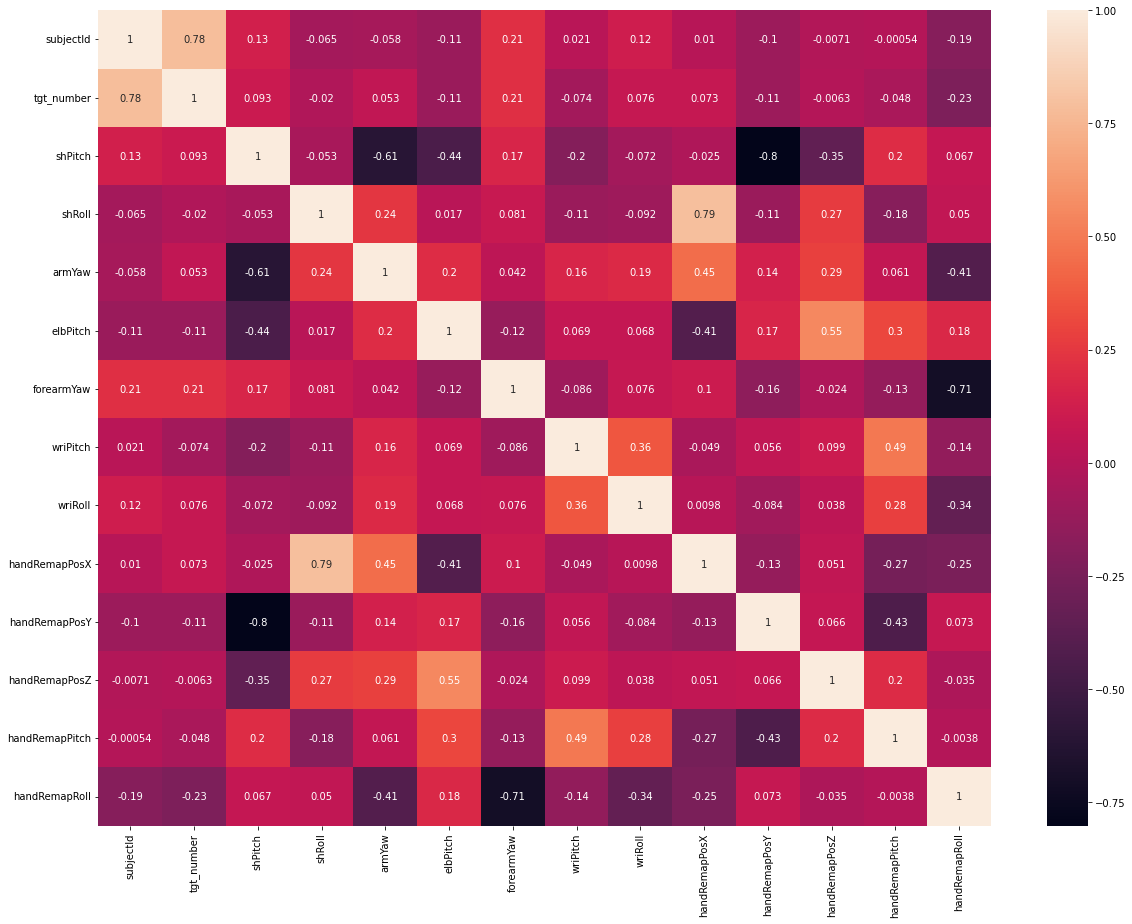

In [10]:
#See the correlation matrix of the data sorted by columns only
corr_matrix = df_sorted.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [11]:
# To verifiy the strong correlation 
df_test_corr = df_tri.corr()['shRoll'] # -1 because the latest row is SalePrice
golden_features_list = df_test_corr[abs(df_test_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with shRoll:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with shRoll:
shRoll           1.000000
handRemapPosX    0.790987
Name: shRoll, dtype: float64


In [12]:
#For comparing the values, means etc
df_tri.describe()

,subjectId,tgt_number,shPitch,shRoll,armYaw,elbPitch,forearmYaw,wriPitch,wriRoll,handRemapPosX,handRemapPosY,handRemapPosZ,handRemapPitch,handRemapRoll
count,88170.000000,88170.000000,88170.000000,88170.000000,88170.000000,88170.000000,88170.000000,88170.000000,88170.000000,88170.000000,88170.000000,88170.000000,88170.000000,88170.000000
mean,16.821844,2503.603493,-1.024425,-0.675607,0.628312,-1.412961,-0.520629,0.173782,-0.249987,-0.100625,-0.002911,0.388387,0.040144,-0.282896
std,10.570980,1426.712679,0.634872,0.322201,0.526756,0.451166,0.586266,0.328270,0.310986,0.188798,0.199454,0.086140,0.657585,0.553957
min,3.000000,0.000000,-3.122709,-1.554320,-2.625367,-2.499161,-2.125118,-0.968483,-1.405372,-0.605164,-0.544986,0.074672,-3.084933,-1.558614
25%,8.000000,1245.000000,-1.460526,-0.908803,0.276672,-1.761617,-0.946214,-0.056206,-0.449666,-0.237447,-0.156933,0.324358,-0.452846,-0.691678
50%,13.000000,2538.000000,-0.980681,-0.693902,0.652385,-1.453445,-0.576706,0.185964,-0.260406,-0.097086,-0.015288,0.383099,0.048142,-0.331400
75%,29.000000,3737.000000,-0.560100,-0.456982,0.984627,-1.087030,-0.143592,0.402236,-0.064408,0.036222,0.141846,0.450955,0.528695,0.092396
max,32.000000,4898.000000,3.139107,0.501330,3.123666,-0.036236,1.613854,1.326560,1.401146,0.445371,0.564903,0.622638,3.073516,1.517101


In [13]:
df_sorted.describe()

,subjectId,tgt_number,shPitch,shRoll,armYaw,elbPitch,forearmYaw,wriPitch,wriRoll,handRemapPosX,handRemapPosY,handRemapPosZ,handRemapPitch,handRemapRoll
count,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000
mean,16.822035,2503.625896,-1.024488,-0.675578,0.628316,-1.413000,-0.520585,0.173741,-0.249950,-0.100597,-0.002894,0.388386,0.040098,-0.283023
std,10.570966,1426.703044,0.634952,0.322153,0.526829,0.451152,0.586334,0.328264,0.310954,0.188778,0.199470,0.086133,0.657416,0.553919
min,3.000000,0.000000,-3.141206,-1.560359,-3.131141,-2.504906,-2.136223,-0.973747,-1.440078,-0.605567,-0.552436,0.072709,-3.133529,-1.560990
25%,8.000000,1245.000000,-1.460757,-0.908679,0.276654,-1.761895,-0.946560,-0.056298,-0.449309,-0.237241,-0.156831,0.324470,-0.453118,-0.691979
50%,13.000000,2538.000000,-0.980412,-0.693729,0.652485,-1.453277,-0.576468,0.185986,-0.260402,-0.097061,-0.015434,0.383093,0.048770,-0.331340
75%,29.000000,3737.000000,-0.560550,-0.456886,0.984462,-1.087090,-0.143582,0.402535,-0.064193,0.036210,0.141803,0.450925,0.528736,0.092558
max,32.000000,4898.000000,3.139107,0.501621,3.128223,-0.019562,1.622628,1.327301,1.401464,0.445426,0.564953,0.622726,3.138423,1.530193


On peut remarquer ici que de prendre les valeurs echantillonés à 9Hz equivaut à prendre les valeurs échantillonés à 90Hz, de pars la matrice de corrélation qui est similaire et aussi les valeurs moyennes et ecarts types.

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


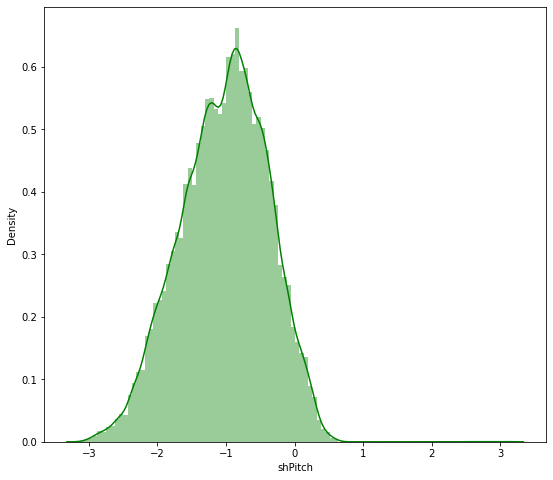

In [14]:
# Plotting the Density of the values in the data 9Hz sorted by columns 
plt.figure(figsize=(9, 8))
sns.distplot(df_tri['shPitch'], color='g', bins=100, hist_kws={'alpha': 0.4});

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


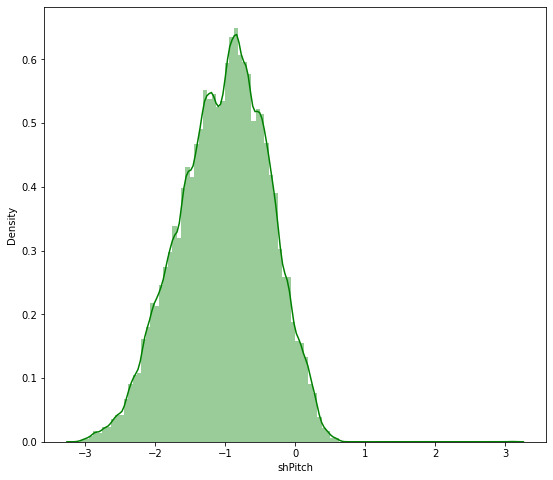

In [15]:
# Plotting the Density of the values in the data 90Hz sorted by columns 
plt.figure(figsize=(9, 8))
sns.distplot(df_sorted['shPitch'], color='g', bins=100, hist_kws={'alpha': 0.4});

Again we can see that compare to 9Hz, it has the same tendancy

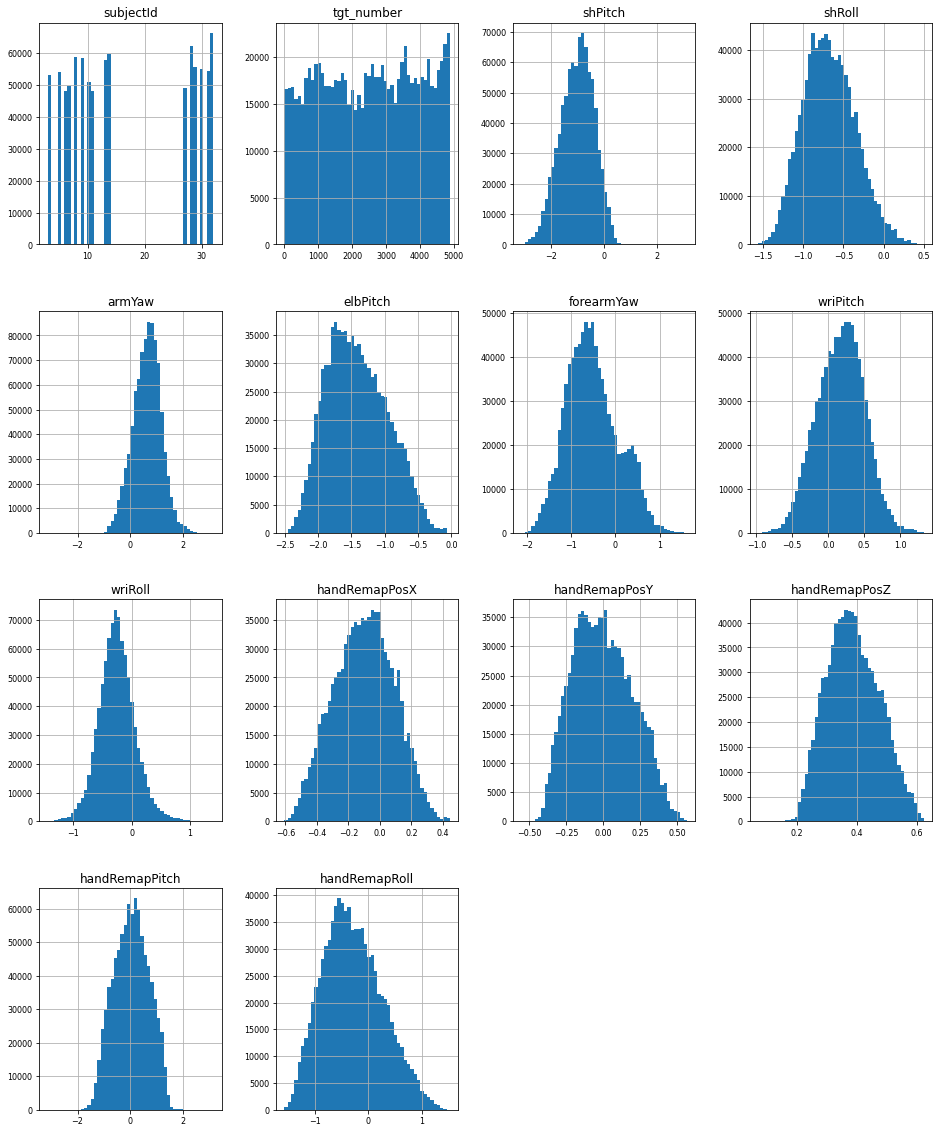

In [16]:
# Plotting the histogramme of the both data to compare
df_sorted.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

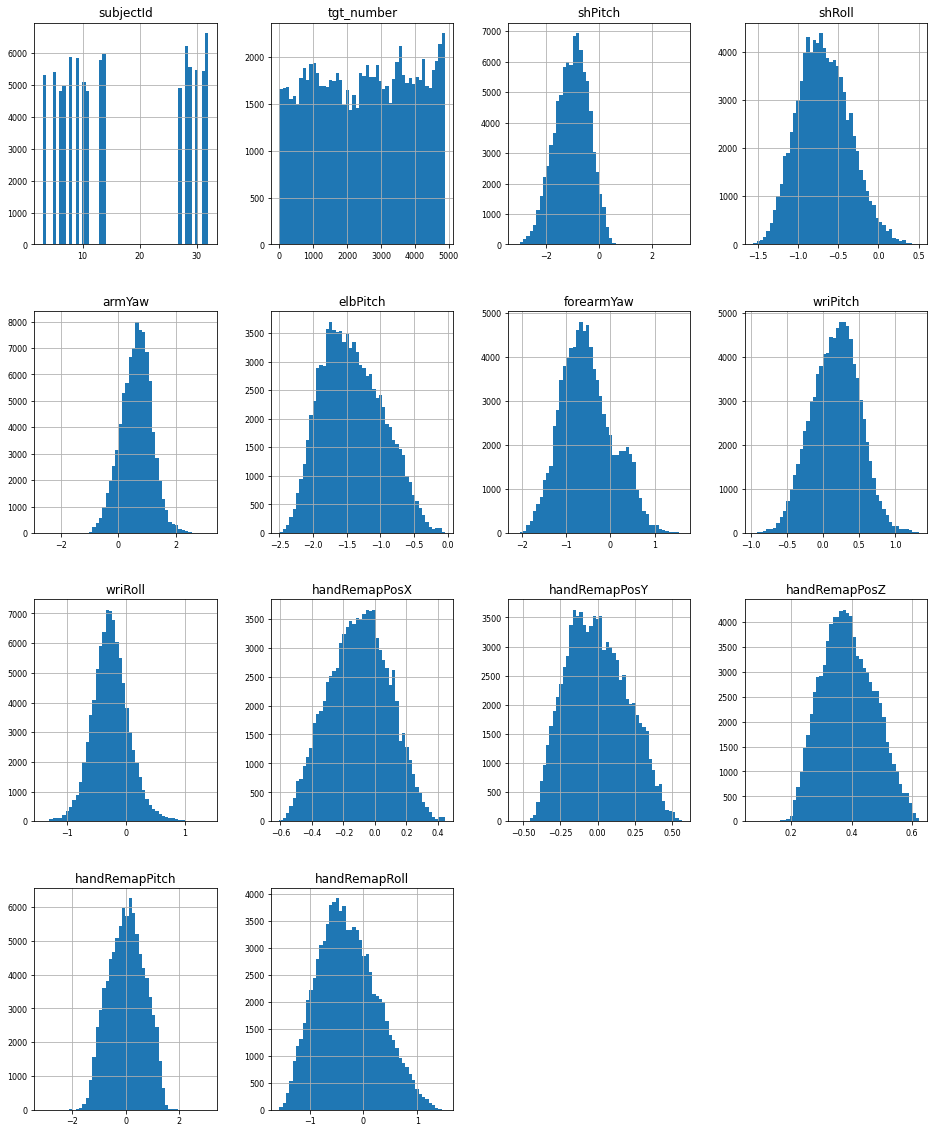

In [17]:
df_tri.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Again, it's the same

### Looking of the plot in time according to majors variables

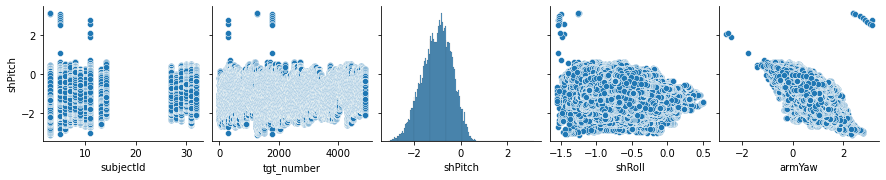

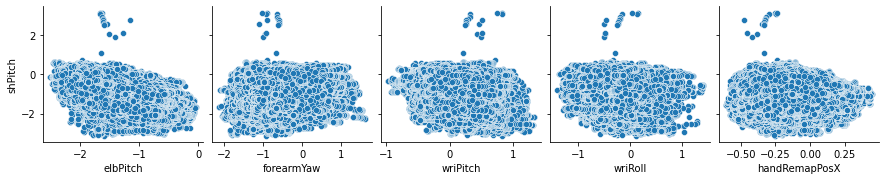

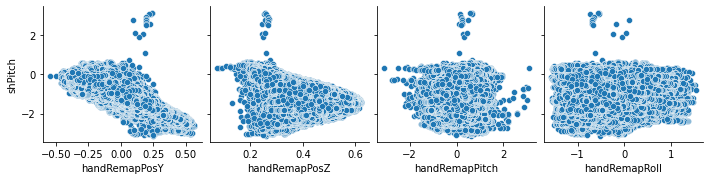

In [18]:
for i in range(0, len(df_tri.columns), 5):
    sns.pairplot(data=df_tri,
                x_vars=df_tri.columns[i:i+5],
                y_vars=['shPitch'])

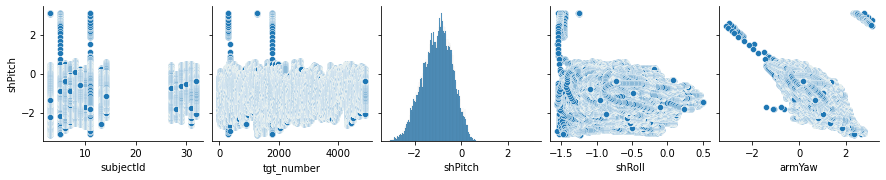

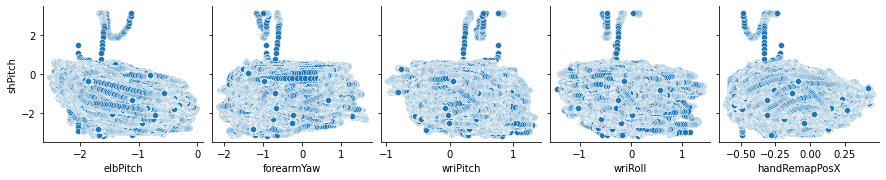

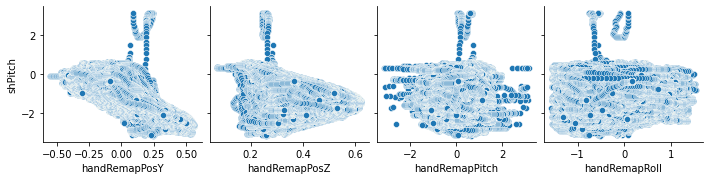

In [19]:
for i in range(0, len(df_sorted.columns), 5):
    sns.pairplot(data=df_sorted,
                x_vars=df_sorted.columns[i:i+5],
                y_vars=['shPitch'])

We can see that there are less values with tri and some strange values that can be removed

## Histogram thresholding 
 In order to remove the strange value that can be plotted by the plot in time

In [20]:
df_df = df_tri[df_tri['shPitch'] < 1 ]
df_df = df_df[df_df['handRemapPitch'] < 2 ]
df_df = df_df[df_df['handRemapPitch'] > -2 ]
df_df = df_df[df_df['handRemapPosZ'] > 0.15 ]

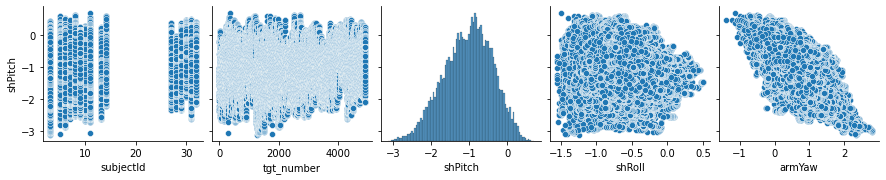

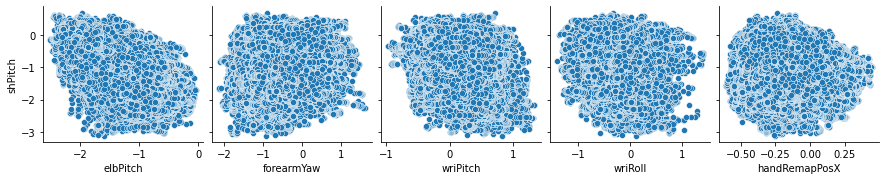

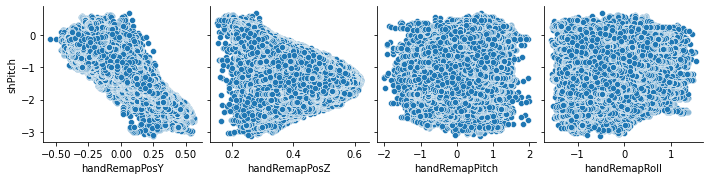

In [21]:
#Verification 
for i in range(0, len(df_df.columns), 5):
    sns.pairplot(data=df_df,
                x_vars=df_df.columns[i:i+5],
                y_vars=['shPitch'])

## Data divison by test data and Train data 

In [22]:
#Taking the first 90% in the 9Hz list with histogram thresold for train data and the last 10% for test data
num_tot = df_df.shape[0]
prc = 90 #Taking 90 for train set

df_1 = df_df.iloc[:int(num_tot*(prc/100)),:]
df_2 = df_df.iloc[int(num_tot*(prc/100)):,:]

input_features = ['shPitch','shRoll','handRemapPosX','handRemapPosY','handRemapPosZ','handRemapPitch','handRemapRoll']
output_features = ['armYaw','elbPitch','forearmYaw','wriPitch','wriRoll']

x_train = df_1[input_features]
y_train = df_1[output_features]

x_test = df_2[input_features]
y_test = df_2[output_features]

#Display the test data
display(df_2)

,subjectId,tgt_number,shPitch,shRoll,armYaw,elbPitch,forearmYaw,wriPitch,wriRoll,handRemapPosX,handRemapPosY,handRemapPosZ,handRemapPitch,handRemapRoll
793600,31,4469,-1.421322,-0.633007,0.872816,-0.939410,0.251978,-0.145010,-0.538554,-0.147779,0.099013,0.555926,-0.196971,-1.044631
793610,31,4469,-1.420908,-0.638809,0.867784,-0.935911,0.282811,-0.184429,-0.568019,-0.149757,0.103401,0.553718,-0.271974,-1.066667
793620,31,4469,-1.417107,-0.645979,0.866066,-0.941557,0.269294,-0.197499,-0.576099,-0.150575,0.104063,0.551348,-0.315114,-1.067743
793630,31,4469,-1.418564,-0.641329,0.867241,-0.949620,0.263576,-0.191502,-0.572586,-0.146922,0.103779,0.551874,-0.314530,-1.055790
793640,31,4470,-1.418019,-0.644219,0.860955,-0.961702,0.261905,-0.187861,-0.569519,-0.147207,0.106430,0.550039,-0.315686,-1.057033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881650,32,4898,-0.374290,-0.737520,0.169605,-1.858331,-0.999023,0.119670,-0.217247,-0.092392,-0.097496,0.367187,0.168659,0.155462
881660,32,4898,-0.370723,-0.738640,0.157427,-1.866030,-0.981686,0.110157,-0.204129,-0.092222,-0.094541,0.365268,0.151010,0.152363
881670,32,4898,-0.365795,-0.739052,0.151378,-1.864599,-0.985297,0.078940,-0.174200,-0.093067,-0.091691,0.363198,0.122021,0.162361
881680,32,4898,-0.363489,-0.736939,0.156200,-1.859938,-0.983018,0.056371,-0.149356,-0.091484,-0.092352,0.362248,0.099898,0.157899


# G3 deep learning model
best one for now

In [23]:
model = keras.Sequential()


model.add(layers.Dense(x_train.shape[1], activation="relu",input_shape=(x_train.shape[1],)))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.2)) #0.6
model.add(layers.Dense(256,activation ="relu"))
model.add(layers.Dropout(0.2)) #0.6
model.add(layers.Dense(5,activation ="linear"))          


model.compile(optimizer=optimizers.Adam(learning_rate = 0.001), loss='mse',metrics=['accuracy'])
history = model.fit(
   x_train, y_train, 
   batch_size = 100, 
   epochs = 30, 
   verbose = 1, 
   validation_data=(x_test,y_test )
)

2022-01-20 09:17:26.086204: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-01-20 09:17:26.106679: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (30acd4dc9f21): /proc/driver/nvidia/version does not exist
2022-01-20 09:17:26.197065: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 7)                 56        
                                                                 
 dense_32 (Dense)            (None, 256)               2048      
                                                                 
 dense_33 (Dense)            (None, 256)               65792     
                                                                 
 dense_34 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 69,181
Trainable params: 69,181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save('modelG34')

## Evaluate the model with the Dataset test 

In [24]:
# Affichhe des résultats de l'évaluation du modèle
results = model.evaluate(x_test, y_test)
print('Resultats apprentissage')
print ('Valeur perte finale (loss)', results[0])
print ('Valeur de la précision(accuracy))', results[1])

276/276 [==============================] - 3s 2ms/step - loss: 0.0064 - accuracy: 0.9778
Resultats apprentissage
Valeur perte finale (loss) 0.006414573639631271
Valeur de la précision(accuracy)) 0.9777525663375854


## Plotting the accuracy and Loss

In [ ]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()